## Описание задачи

Данные дистанционного зондирования Земли из космоса позволяют решать большое количество производственных задач. Например,определять культуры растений на основе анализа временных рядов значений вегетационных индексов (NDVI), получаемых на протяжении вегетационного периода (периода роста и развития растений). NDVI – это индекс, определяемый по поглощению и отражению растениями лучей красной и ближней инфракрасной зоны спектра при анализе изображений космоснимков. По значению этого индекса можно судить о развитии зеленой массы растений во время вегетации. Чем больше зеленой биомассы на полях, тем выше значение NDVI. Общая посевная площадь в России в 2022 году составила более 81 млн га. Для грамотного планирования сельскохозяйственного производства в масштабах страны, применения технологий точного земледелия, проведения мероприятий по защите растений, оценки урожайности критически важным является распознавание культур растений, произрастающих на каждом конкретном поле.

Перед участниками чемпионата стоит задача классификации агрокультур на основе изменения показателя вегетационных индексов во временной последовательности. Созданная за время чемпионата модель поможет оптимизировать рабочие процессы в сфере сельского хозяйства, обеспечить органы власти актуальными и достоверными сведениями, увеличить социальный, инвестиционный и производственный потенциал отрасли, а также повысить достоверность и удобство использования информации о сельскохозяйственных объектах.

В качестве метрики выступает **Recall** по столбцу **crop**

## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\project_jupyter\innopolis\train_dataset_train.csv')

## Рассмотрим датасет по ближе

In [3]:
df.head(3)

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   area                4830 non-null   int64  
 2   nd_mean_2021-04-16  4830 non-null   float64
 3   nd_mean_2021-04-19  4830 non-null   float64
 4   nd_mean_2021-04-22  4830 non-null   float64
 5   nd_mean_2021-04-26  4830 non-null   float64
 6   nd_mean_2021-04-28  4830 non-null   float64
 7   nd_mean_2021-05-02  4830 non-null   float64
 8   nd_mean_2021-05-04  4830 non-null   float64
 9   nd_mean_2021-05-07  4830 non-null   float64
 10  nd_mean_2021-05-16  4830 non-null   float64
 11  nd_mean_2021-05-17  4830 non-null   float64
 12  nd_mean_2021-05-21  4830 non-null   float64
 13  nd_mean_2021-05-26  4830 non-null   float64
 14  nd_mean_2021-05-27  4830 non-null   float64
 15  nd_mean_2021-05-29  4830 non-null   float64
 16  nd_mea

Рассмотрим единственный не числовой столбец 

In [5]:
df.select_dtypes(include=['object'])

,.geo
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269..."
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110..."
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998..."
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181..."
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934..."
...,...
4825,"{""type"":""Polygon"",""coordinates"":[[[40.90052911..."
4826,"{""type"":""Polygon"",""coordinates"":[[[40.00883381..."
4827,"{""type"":""Polygon"",""coordinates"":[[[38.57789936..."
4828,"{""type"":""Polygon"",""coordinates"":[[[53.31082730..."


In [6]:
df['.geo']

0       {"type":"Polygon","coordinates":[[[42.49107269...
1       {"type":"Polygon","coordinates":[[[50.25545110...
2       {"type":"Polygon","coordinates":[[[37.99698998...
3       {"type":"Polygon","coordinates":[[[44.72154181...
4       {"type":"Polygon","coordinates":[[[34.77829934...
                              ...                        
4825    {"type":"Polygon","coordinates":[[[40.90052911...
4826    {"type":"Polygon","coordinates":[[[40.00883381...
4827    {"type":"Polygon","coordinates":[[[38.57789936...
4828    {"type":"Polygon","coordinates":[[[53.31082730...
4829    {"type":"Polygon","coordinates":[[[38.79371096...
Name: .geo, Length: 4830, dtype: object

Это столбец **.geo**

Тепепрь рассмотрим главный столбец с C/Х культурой

<AxesSubplot:>

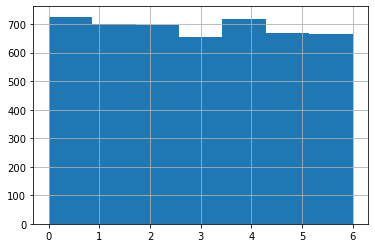

In [7]:
df["crop"].hist(bins = 7)

Заметен слабый разброс популярности категориий. Видно что количество культур равномерно сбалансировано, т.е не присутствует дисбаланс в классах

In [8]:
df["crop"].value_counts()

0    726
4    718
1    700
2    697
5    668
6    666
3    655
Name: crop, dtype: int64

Посмотрим на разброс площади полей

<AxesSubplot:xlabel='area', ylabel='count'>

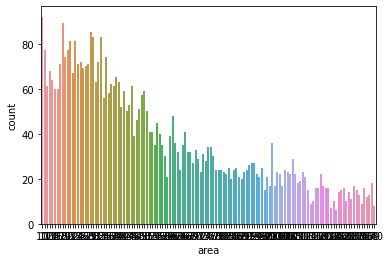

In [9]:
sns.countplot(x = "area" , data  = df)  

Постараемся найти закономерность

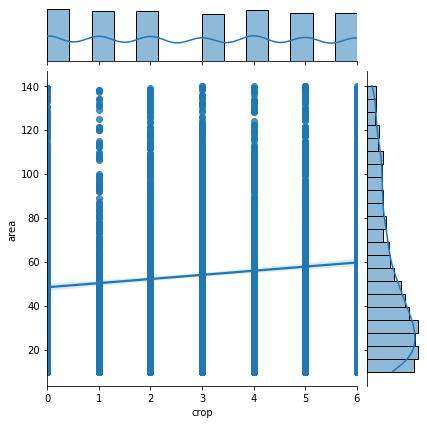

In [10]:
sns.jointplot(x = "crop", y = 'area', data = df, kind = 'reg')

Кажется нет четкой зависимости между категорией культуры и площадью территроии

Последняя попытка найти явную зависимость в данных

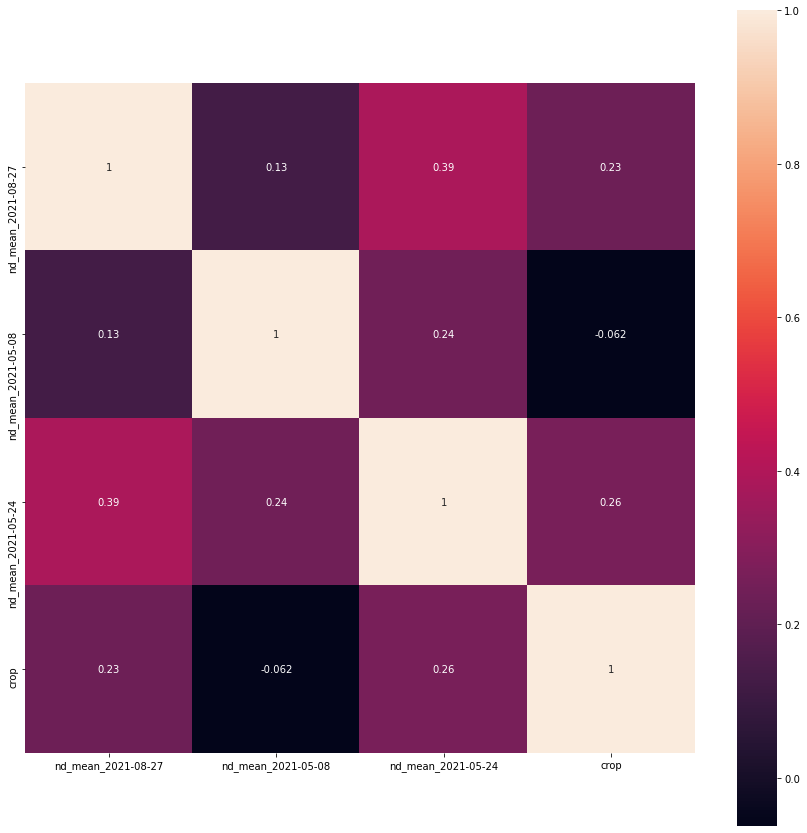

In [12]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square = True, annot=True)

Отсротируем датафрейм чтобы данные были отсортированы по датам

In [13]:
df = df[sorted(df.columns)]

In [14]:
df.head()

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45,4,3739,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28,2,1294,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19,5,2859,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",33,4,3685,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048


## Выделим выборки

In [15]:
x = df.drop(["id",".geo","crop"], axis = 1)
y = df[["crop"]]

In [16]:
x.head()

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,20,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.000000,0.077577,0.104442,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,45,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,28,0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,0.112471,0.041751,0.037839,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,19,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,0.011531,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,33,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,0.109385,0.000000,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048


## Обучение модели

Разобьем данные на тренировочную и тестовую выборку.

Будем тестировать метрику **RECALL** на моделях случайного леса и CatBoost. БУдем считать качество на:

* 1)Отсортированный датасет со всеми признаками
* 2)Посмотрим какие признаки являются самыми важными у модели, проведем тестирование с учетом исключения части менее важных признаков
* 3)Замена нулевых значений на среднее арифмитическое двух соседних столбцов
* 4)Нормализация данных

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=12345)

Сделаем две функции для моделей случайного леса и бустинга(Catboost). Внутри каждой функции будем считать нашу метрику RECALL, и подбирать наиболее подходящие гипперпараметры


In [18]:
def cat(x_train, x_test, y_train, y_test):
    best_model = None
    best_recall = 0
    best_depth = 0
    best_iterations = 0

    
    
    

    for iteration in range(211, 511,100):
        for dept in range (4, 7, 1):
            model = CatBoostClassifier(loss_function="MultiClass", iterations=iteration,depth=dept,task_type='CPU')
            model.fit(x_train,y_train,  verbose=300) 
            predicted = model.predict(x_test)
            recall = recall_score(y_test, predicted, average="macro", zero_division=0)
            if recall > best_recall:
                best_model = model
                best_recall = recall   
                best_depth = dept
                best_iterations = iteration

                    
                


    display("Наилучшее recall:", best_recall)
    display("Наилучшая максимальной глубина:", best_depth)
    display("Наилучшее количество итераций:", best_iterations)


In [19]:
def forest(x_train, x_test, y_train, y_test):
    best_model = None
    best_recall = 0
    best_depth = 0
    best_estimators = 0
    best_features = 0
    
    
    
    
    for est in range(1000, 2001, 100):
        for depth in range (13, 20):
            model = RandomForestClassifier(random_state=12345, n_estimators= est,max_depth=depth, n_jobs = -1) 
            model.fit(x_train,y_train) 
            predicted = model.predict(x_test)
            recall = recall_score(y_test, predicted, average="macro", zero_division=0)
            if recall > best_recall:
                best_model = model
                best_recall = recall   
                best_depth = depth
                best_estimators = est
               
                


    display("Наилучшее recall:", best_recall)
    display("Наилучшая максимальной глубина:", best_depth)
    display("Наилучшее количество итераций:", best_estimators)
    
    

### Отсортированный датасет со всеми признаками

In [20]:
display(cat(x_train, x_test, y_train, y_test))

Learning rate set to 0.300275
0:	learn: 1.5272335	total: 238ms	remaining: 50s
210:	learn: 0.0437688	total: 9.59s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.5398151	total: 134ms	remaining: 28.1s
210:	learn: 0.0298738	total: 16s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.5042362	total: 178ms	remaining: 37.4s
210:	learn: 0.0226374	total: 31s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6265749	total: 57.8ms	remaining: 17.9s
300:	learn: 0.0407359	total: 11.1s	remaining: 368ms
310:	learn: 0.0392370	total: 11.4s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6382961	total: 86.2ms	remaining: 26.7s
300:	learn: 0.0279221	total: 22s	remaining: 730ms
310:	learn: 0.0266775	total: 22.7s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6125301	total: 168ms	remaining: 51.9s
300:	learn: 0.0200405	total: 43s	remaining: 1.43s
310:	learn: 0.0190573	total: 44.5s	remaining: 0us
Learning rate set to 0.170939
0:	learn: 1.6865450	total: 53.6ms	remainin

'Наилучшее recall:'

0.9530046393529966

'Наилучшая максимальной глубина:'

5

'Наилучшее количество итераций:'

411

None

Сохраним и обучим лучшую модель CatBoost

In [21]:
model_cb_best = CatBoostClassifier(loss_function="MultiClass", iterations=411,depth=5,task_type='CPU')
model_cb_best.fit(x,y,verbose=300) 


Learning rate set to 0.181764
0:	learn: 1.5585719	total: 92.8ms	remaining: 38.1s
300:	learn: 0.0419888	total: 24.1s	remaining: 8.79s
410:	learn: 0.0288177	total: 32.5s	remaining: 0us


In [22]:
display(forest(x_train, x_test, y_train, y_test))

'Наилучшее recall:'

0.9559291919332542

'Наилучшая максимальной глубина:'

17

'Наилучшее количество итераций:'

1700

None

Сохраним и обучим лучшую модель случайного леса

In [23]:
model_forest_best = RandomForestClassifier(random_state = 12345, n_estimators= 1700,max_depth=17)
model_forest_best.fit(x, y)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=12345)

### Посмотрим какие признаки являются самыми важными у модели, проведем тестирование с учетом исключения части менее важных признаков и оценим новое качество

Посмотрим какие признаки самые важные

In [24]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(model_forest_best, x_test)
display(fi.head(10))


,cols,imp
21,nd_mean_2021-05-10,0.074071
42,nd_mean_2021-06-16,0.063790
25,nd_mean_2021-05-19,0.038161
63,nd_mean_2021-08-01,0.036846
22,nd_mean_2021-05-15,0.033270
60,nd_mean_2021-07-27,0.031920
68,nd_mean_2021-08-13,0.031385
48,nd_mean_2021-06-27,0.031264
38,nd_mean_2021-06-09,0.029997
69,nd_mean_2021-08-23,0.027784


In [25]:
px = fi['imp'].head(50).sum()
px

0.9565194920125282

50 столбцов дают 96% данных для модели,посмотрим какой будет recall у модели с такими столбцами

In [26]:
px = fi['cols'].head(50)
px = px.to_list()


In [27]:
x_2 = x.loc[:, px]

In [28]:
x_2

,nd_mean_2021-05-10,nd_mean_2021-06-16,nd_mean_2021-05-19,nd_mean_2021-08-01,nd_mean_2021-05-15,nd_mean_2021-07-27,nd_mean_2021-08-13,nd_mean_2021-06-27,nd_mean_2021-06-09,nd_mean_2021-08-23,...,nd_mean_2021-04-19,nd_mean_2021-06-07,nd_mean_2021-08-12,nd_mean_2021-04-20,nd_mean_2021-05-07,nd_mean_2021-05-27,nd_mean_2021-05-04,nd_mean_2021-05-09,nd_mean_2021-06-05,nd_mean_2021-04-25
0,0.213006,0.000000,0.425571,0.754859,0.358304,0.112933,0.126832,0.100555,0.441994,0.034858,...,0.261778,0.111821,0.658016,0.063134,0.000000,0.384805,0.158723,0.102757,0.000000,0.077577
1,0.160796,0.000000,0.248935,0.706226,0.031104,0.073804,0.174914,0.654727,0.000000,0.000000,...,0.287182,0.708402,0.601685,0.064671,0.163340,0.692873,0.140326,0.000000,0.000000,0.173578
2,0.151504,0.717313,0.127633,0.000000,0.002801,0.119380,0.090607,0.741171,0.516493,0.000000,...,0.007055,0.056252,0.000000,0.000000,0.506516,0.245910,0.037446,0.028961,0.210496,0.041751
3,0.099087,0.064643,0.527583,0.152193,0.412416,0.242224,0.073492,0.563310,0.000000,0.061776,...,0.052500,0.008742,0.327025,0.153700,0.043604,0.707093,0.000000,0.052864,0.132886,0.072589
4,0.066768,0.241749,0.000000,0.772962,0.001654,0.761576,0.157676,0.172385,0.019552,0.022251,...,0.063492,0.239705,0.055220,0.040565,0.101479,0.244165,0.254284,0.024860,0.152003,0.109385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.149278,0.027693,0.169733,0.700605,0.100532,0.623504,0.042483,0.672108,0.103028,0.118901,...,0.038282,0.012724,0.631144,0.000000,0.016856,0.076056,0.071684,0.013175,0.066882,0.241602
4826,0.149736,0.000000,0.041057,0.634428,0.070449,0.752198,0.055721,0.766793,0.177245,0.057945,...,0.030722,0.107349,0.776900,0.246513,0.286298,0.027970,0.265180,0.074903,0.131357,0.022246
4827,0.163403,0.090844,0.022025,0.781434,0.000000,0.642035,0.007225,0.791055,0.034476,0.669367,...,0.063581,0.060162,0.000000,0.000000,0.399439,0.275487,0.092693,0.003097,0.142930,0.218746
4828,0.166851,0.678164,0.490711,0.000000,0.549239,0.005442,0.031836,0.542130,0.233727,0.000000,...,0.221428,0.000000,0.528256,0.326494,0.183555,0.659813,0.112403,0.000000,0.085861,0.000000


In [29]:
x_train_2, x_test_2, y_train, y_test = train_test_split(x_2, y, test_size=0.7, random_state=12345)

In [30]:
display(forest(x_train_2, x_test_2, y_train, y_test))

'Наилучшее recall:'

0.952930333581039

'Наилучшая максимальной глубина:'

17

'Наилучшее количество итераций:'

1700

None

In [31]:
display(cat(x_train_2, x_test_2, y_train, y_test))

Learning rate set to 0.300275
0:	learn: 1.4253605	total: 47.8ms	remaining: 10s
210:	learn: 0.0408009	total: 5.73s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.4555098	total: 54.5ms	remaining: 11.4s
210:	learn: 0.0284709	total: 11.2s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.4197627	total: 123ms	remaining: 25.9s
210:	learn: 0.0203698	total: 27.9s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.5480951	total: 34.8ms	remaining: 10.8s
300:	learn: 0.0370468	total: 11.8s	remaining: 392ms
310:	learn: 0.0354333	total: 12.3s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.5738967	total: 134ms	remaining: 41.6s
300:	learn: 0.0273822	total: 20s	remaining: 665ms
310:	learn: 0.0259951	total: 20.9s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.5475590	total: 187ms	remaining: 58s
300:	learn: 0.0199650	total: 37.9s	remaining: 1.26s
310:	learn: 0.0190842	total: 38.9s	remaining: 0us
Learning rate set to 0.170939
0:	learn: 1.6225835	total: 32.7ms	rem

'Наилучшее recall:'

0.9477272882874493

'Наилучшая максимальной глубина:'

5

'Наилучшее количество итераций:'

311

None

**Вывод** 

Качество моделей с уменьшением количества признаков падает,но незначительно

### Замена нулевых значений на среднее арифмитическое двух соседних столбцов

In [32]:
df_3 = df.copy()

In [33]:
column = df_3.columns
column = column.tolist()


Заменим нулевые значения на Nan чтобы применить интеполяцию

In [34]:
for col in column:
    df_3.loc[df_3[col] == 0,col] = np.nan


In [35]:
df_3.head(9)

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20.0,3.0,3536.0,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,...,0.727516,NaN,0.754859,NaN,0.030883,NaN,0.658016,0.126832,0.034858,0.614770
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",45.0,4.0,3739.0,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,NaN,0.179612
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",28.0,2.0,1294.0,0.006391,0.013679,NaN,0.007055,NaN,0.120804,...,0.321827,0.411168,NaN,0.357296,0.045370,0.172080,NaN,0.090607,NaN,0.054127
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",19.0,5.0,2859.0,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,...,NaN,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",33.0,4.0,3685.0,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,...,0.833694,0.611108,0.772962,NaN,0.080592,NaN,0.055220,0.157676,0.022251,0.012048
5,"{""type"":""Polygon"",""coordinates"":[[[52.67253376...",10.0,5.0,6443.0,0.320621,0.280111,0.307892,0.255778,0.372666,0.174677,...,0.206912,0.146268,NaN,0.019088,0.207015,0.406300,0.402006,0.040244,NaN,0.377847
6,"{""type"":""Polygon"",""coordinates"":[[[32.91307525...",22.0,4.0,6889.0,0.039325,0.065092,0.183984,0.095285,0.121045,0.317724,...,0.635466,0.588876,0.572164,0.008740,0.082670,0.597229,0.675592,0.138907,0.013020,0.030898
7,"{""type"":""Polygon"",""coordinates"":[[[54.47719421...",83.0,6.0,5703.0,NaN,0.019472,0.030816,0.250000,0.040852,NaN,...,0.602259,NaN,0.805295,0.778867,0.168473,0.178982,0.661910,0.006577,0.159913,0.073889
8,"{""type"":""Polygon"",""coordinates"":[[[49.84398324...",121.0,1.0,1112.0,0.035396,0.140723,0.234005,0.151389,NaN,0.084425,...,0.428142,NaN,0.628895,NaN,0.048167,0.656421,0.632274,0.225484,0.547460,0.237937


In [36]:
df_3 = df_3.drop(["id",".geo","crop"], axis = 1)

In [37]:
df_3 = df_3.interpolate(method = 'linear', limit_direction = 'forward', axis = 1)

In [38]:
df_3.head(10)

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,20.0,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.070279,0.077577,0.104442,...,0.727516,0.741187,0.754859,0.392871,0.030883,0.344449,0.658016,0.126832,0.034858,0.614770
1,45.0,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.177263,0.179612
2,28.0,0.006391,0.013679,0.010367,0.007055,0.063929,0.120804,0.112471,0.041751,0.037839,...,0.321827,0.411168,0.384232,0.357296,0.045370,0.172080,0.131344,0.090607,0.072367,0.054127
3,19.0,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,0.011531,...,0.149104,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,33.0,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,0.109385,0.065578,...,0.833694,0.611108,0.772962,0.426777,0.080592,0.067906,0.055220,0.157676,0.022251,0.012048
5,10.0,0.320621,0.280111,0.307892,0.255778,0.372666,0.174677,0.188795,0.007760,0.327109,...,0.206912,0.146268,0.082678,0.019088,0.207015,0.406300,0.402006,0.040244,0.209045,0.377847
6,22.0,0.039325,0.065092,0.183984,0.095285,0.121045,0.317724,0.113229,0.246601,0.092715,...,0.635466,0.588876,0.572164,0.008740,0.082670,0.597229,0.675592,0.138907,0.013020,0.030898
7,83.0,41.509736,0.019472,0.030816,0.250000,0.040852,0.057585,0.074318,0.164460,0.254601,...,0.602259,0.703777,0.805295,0.778867,0.168473,0.178982,0.661910,0.006577,0.159913,0.073889
8,121.0,0.035396,0.140723,0.234005,0.151389,0.117907,0.084425,0.025195,0.112824,0.200453,...,0.428142,0.528519,0.628895,0.338531,0.048167,0.656421,0.632274,0.225484,0.547460,0.237937
9,18.0,0.141089,0.259478,0.127862,0.275341,0.241071,0.206800,0.007376,0.060192,0.113008,...,0.473041,0.641121,0.683333,0.086119,0.092369,0.098620,0.201081,0.049767,0.048599,0.047431


In [39]:
y_3 = df[["crop"]]

In [40]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(df_3, y_3, test_size=0.7, random_state=12345)

In [41]:
display(df_3)

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,20.0,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,0.070279,0.077577,0.104442,...,0.727516,0.741187,0.754859,0.392871,0.030883,0.344449,0.658016,0.126832,0.034858,0.614770
1,45.0,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,0.024539,0.173578,0.152467,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.177263,0.179612
2,28.0,0.006391,0.013679,0.010367,0.007055,0.063929,0.120804,0.112471,0.041751,0.037839,...,0.321827,0.411168,0.384232,0.357296,0.045370,0.172080,0.131344,0.090607,0.072367,0.054127
3,19.0,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,0.045054,0.072589,0.011531,...,0.149104,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,33.0,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,0.163886,0.109385,0.065578,...,0.833694,0.611108,0.772962,0.426777,0.080592,0.067906,0.055220,0.157676,0.022251,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,74.0,0.066154,0.028770,0.033526,0.038282,0.146806,0.255329,0.095812,0.241602,0.148166,...,0.683847,0.379482,0.700605,0.645532,0.352311,0.059090,0.631144,0.042483,0.118901,0.022464
4826,109.0,0.243867,0.035939,0.013403,0.030722,0.246513,0.033869,0.028057,0.022246,0.029646,...,0.792938,0.800815,0.634428,0.783913,0.093728,0.435314,0.776900,0.055721,0.057945,0.044182
4827,58.0,0.090026,0.191255,0.019897,0.063581,0.101846,0.140111,0.143922,0.218746,0.323984,...,0.627561,0.740523,0.781434,0.783490,0.006700,0.132444,0.069834,0.007225,0.669367,0.145505
4828,14.0,0.301663,0.291399,0.295089,0.221428,0.326494,0.007247,0.006888,0.030981,0.055074,...,0.133080,0.235802,0.157713,0.079623,0.049245,0.506127,0.528256,0.031836,0.242494,0.453151


In [43]:
display(forest(x_train_3, x_test_3, y_train_3, y_test_3))

'Наилучшее recall:'

0.9096066884509347

'Наилучшая максимальной глубина:'

14

'Наилучшее количество итераций:'

1300

None

In [44]:
display(cat(x_train_3, x_test_3, y_train_3, y_test_3))

Learning rate set to 0.300275
0:	learn: 1.5523049	total: 96.9ms	remaining: 20.3s
210:	learn: 0.0735959	total: 28.7s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.5394568	total: 163ms	remaining: 34.1s
210:	learn: 0.0519882	total: 43.5s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.5127884	total: 447ms	remaining: 1m 33s
210:	learn: 0.0374494	total: 56.8s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6474477	total: 79.9ms	remaining: 24.8s
300:	learn: 0.0730719	total: 29s	remaining: 964ms
310:	learn: 0.0705611	total: 29.5s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6390458	total: 98.2ms	remaining: 30.5s
300:	learn: 0.0518408	total: 47.6s	remaining: 1.58s
310:	learn: 0.0494276	total: 49.4s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6193886	total: 406ms	remaining: 2m 5s
300:	learn: 0.0337452	total: 1m 5s	remaining: 2.17s
310:	learn: 0.0321037	total: 1m 7s	remaining: 0us
Learning rate set to 0.170939
0:	learn: 1.7040805	total: 46.6m

'Наилучшее recall:'

0.9233090617071156

'Наилучшая максимальной глубина:'

6

'Наилучшее количество итераций:'

411

None

Замена нулевых значений на среднее соседних столбцов приводит к значительному ухудшению качества предсказаний модели.

### Нормализация данных

In [45]:
df_2 = df.copy()

In [46]:
x_2 = df_2.drop(["id",".geo","crop"], axis = 1)
y_2 = df_2[["crop"]]

In [47]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = x_2.columns
d = scaler.fit_transform(x_2)



scaler_df = pd.DataFrame(d, columns = names)
scaler_df.head()

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,0.076923,0.342493,0.073755,0.335615,0.344333,0.114754,0.082388,0.045922,0.109569,0.106164,...,0.773172,0.007404,0.800899,0.000000,0.037903,0.000000,0.718557,0.141552,0.038077,0.781251
1,0.269231,0.441478,0.337083,0.437334,0.377749,0.117547,0.127071,0.083517,0.226964,0.154981,...,0.708771,0.102257,0.749300,0.216724,0.076809,0.709462,0.657043,0.195214,0.000000,0.228251
2,0.138462,0.034716,0.013850,0.028350,0.009280,0.000000,0.158030,0.218232,0.065759,0.038463,...,0.342024,0.442090,0.000000,0.420313,0.055684,0.197396,0.000000,0.101123,0.000000,0.068785
3,0.069231,0.523447,0.107299,0.400920,0.069057,0.279366,0.002508,0.114947,0.103470,0.011721,...,0.000000,0.066589,0.161476,0.071354,0.432912,0.434982,0.357113,0.082021,0.067482,0.481507
4,0.176923,0.071480,0.132519,0.165674,0.083515,0.073732,0.031939,0.297000,0.148465,0.000000,...,0.886013,0.653466,0.820106,0.000000,0.098913,0.000000,0.060301,0.175975,0.024306,0.015311


In [48]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(scaler_df, y_2, test_size=0.7, random_state=12345)

In [49]:
display(cat(x_train, x_test, y_train, y_test))

Learning rate set to 0.300275
0:	learn: 1.5272335	total: 60.1ms	remaining: 12.6s
210:	learn: 0.0437688	total: 11.5s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.5398151	total: 115ms	remaining: 24.1s
210:	learn: 0.0298738	total: 33.4s	remaining: 0us
Learning rate set to 0.300275
0:	learn: 1.5042362	total: 180ms	remaining: 37.8s
210:	learn: 0.0226374	total: 1m 4s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6265749	total: 49.7ms	remaining: 15.4s
300:	learn: 0.0407359	total: 25.8s	remaining: 858ms
310:	learn: 0.0392370	total: 27.3s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6382961	total: 120ms	remaining: 37.2s
300:	learn: 0.0279221	total: 40.8s	remaining: 1.36s
310:	learn: 0.0266775	total: 42.7s	remaining: 0us
Learning rate set to 0.216349
0:	learn: 1.6125301	total: 488ms	remaining: 2m 31s
300:	learn: 0.0200405	total: 1m 16s	remaining: 2.54s
310:	learn: 0.0190573	total: 1m 18s	remaining: 0us
Learning rate set to 0.170939
0:	learn: 1.6865450	total: 17

'Наилучшее recall:'

0.9530046393529966

'Наилучшая максимальной глубина:'

5

'Наилучшее количество итераций:'

411

None

**Вывод** 

Нормлизация данных не улучшила качество тестовых моделей

### Подготовим тестовый датасет

In [50]:
df_test = pd.read_csv(r'C:\project_jupyter\innopolis\test_dataset_test.csv')
df_samp = pd.read_csv(r'C:\project_jupyter\innopolis\sample_solution.csv')

In [51]:
df_test = df_test[sorted(df_test.columns)]

In [52]:
df_test.head()

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",26,611,0.083038,0.196691,0.244827,0.000000,0.241219,0.259303,0.064947,...,0.719171,0.000000,0.593911,0.000000,0.000000,0.192016,0.164840,0.714292,0.065030,0.084197
1,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",98,6417,0.122470,0.091192,0.241003,0.000000,0.181600,0.125823,0.108175,...,0.317670,0.329803,0.000000,0.007428,0.000000,0.106484,0.167479,0.000000,0.000000,0.108945
2,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",21,3352,0.259347,0.000000,0.297489,0.033368,0.000000,0.285057,0.374026,...,0.534127,0.000000,0.549128,0.000000,0.026141,0.469352,0.477381,0.037838,0.000000,0.158279
3,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",18,4224,0.166209,0.111243,0.000000,0.201012,0.083885,0.000000,0.015033,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",53,3102,0.010862,0.000000,0.067479,0.234954,0.000000,0.000000,0.000000,...,0.000000,0.134136,0.780305,0.030224,0.046893,0.000000,0.779191,0.048622,0.650742,0.121296


## Оценка точности

In [53]:
x_1 = df_test.drop(["id",".geo"], axis = 1)


In [55]:
df_test_pred = model_cb_best.predict(x_1)

In [56]:
df_samp["crop"] = df_test_pred
df_samp.head()

,id,crop
0,611,3
1,6417,2
2,3352,3
3,4224,1
4,3102,6


In [57]:
df_samp.to_csv(r'C:\project_jupyter\innopolis\y_1.csv', index=False)

## Общий вывод

В данной задачи стояла цель по классификации агрокультур на основе изменения показателя вегетационных индексов во временной последовательности.

Целевой признак был сбалансирован по классам. 

Тестировали метрику **RECALL** на моделях случайного леса и CatBoost. Тестирование проводили на выборках:

* 1)Отсортированный датасет со всеми признаками
* 2)Посмотрим какие признаки являются самыми важными у модели, проведем тестирование с учетом исключения части менее важных признаков
* 3)Замена нулевых значений на среднее арифмитическое двух соседних столбцов
* 4)Нормализация данных


Лучшее качество показал отсортированный датасет со всеми признаками. 

RECALL на Catboost - 0.953; RECALL на RandoomForest-0.9559

Нормализация данных не улучшила качество модели, модели без части менее важных признаков и со средним арифтмитическим для нулевых значений показывали худшее качество.

По итогам обучения модели по всем признакам и проверки метрики на тестовом датасете RECALL-0.962547